**DB Scan clustering**

**Problem Statement:**

Airplane crashes are a major concern for the aviation industry and have significant impacts on human lives and the economy. Analyzing past airplane crash data can provide valuable insights into the causes and contributing factors of crashes, as well as help identify patterns and trends that can inform safety measures and policies. However, with a large volume of crash data available, it can be challenging to extract meaningful information from the data. The use of text clustering with K-means, hierarchical clustering and DB- scan can help to organize and classify the crash data into meaningful groups, facilitating further analysis and interpretation of the data. Therefore, the problem is to develop an effective text clustering approach using clustering to cluster airplane crash data into meaningful groups that can provide insights into crash patterns and factors.

The data of Airplane crash is taken from Kaggle the link of the dataset is provided below:

https://www.kaggle.com/datasets/saurograndi/airplane-crashes-since-1908

**Importing the Libraries**

In [ ]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style()
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Loading the Accident dataset**

In [ ]:
import pandas as pd
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [ ]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


**DATA DESCRIPTION**

**The shape**

In [ ]:
df.shape

(5268, 13)

**Printing the information of the dataset.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


**Details of the null values in the datset.**

In [ ]:
df.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

**Inference:** As there are more null values in Flight # therefore we drop that column.

In [ ]:
percentage = pd.Series(round(df.isnull().sum()/len(df),3), name = "percentage of null vlaues")
Null_values = pd.Series(df.isnull().sum(), name ="Null Values")
pd.concat([percentage,Null_values],axis = 1)

,percentage of null vlaues,Null Values
Date,0.000,0
Time,0.421,2219
Location,0.004,20
Operator,0.003,18
Flight #,0.797,4199
Route,0.324,1706
Type,0.005,27
Registration,0.064,335
cn/In,0.233,1228
Aboard,0.004,22


**Droping the column which has more null values.**

In [ ]:
df.drop(["Flight #"],axis=1,inplace = True)

**Handelling Null Values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Route         3562 non-null   object 
 5   Type          5241 non-null   object 
 6   Registration  4933 non-null   object 
 7   cn/In         4040 non-null   object 
 8   Aboard        5246 non-null   float64
 9   Fatalities    5256 non-null   float64
 10  Ground        5246 non-null   float64
 11  Summary       4878 non-null   object 
dtypes: float64(3), object(9)
memory usage: 494.0+ KB


**Imputing the mode for the null values.**

In [ ]:
mode_loca = df["Location"].mode()
df["Location"] = df["Location"].fillna(mode_loca)

In [ ]:
categorical = [i for i in df.columns if df[i].dtype=="object"]
no_categorical = len(categorical)
print("the  number of variables", no_categorical)
print("the categorical column",categorical)

the  number of variables 9
the categorical column ['Date', 'Time', 'Location', 'Operator', 'Route', 'Type', 'Registration', 'cn/In', 'Summary']


In [ ]:
for i in categorical:
    print(df[i].value_counts())

09/11/2001    4
02/28/1973    4
08/31/1988    4
08/28/1976    4
08/27/1992    4
             ..
04/22/1962    1
05/06/1962    1
05/08/1962    1
05/09/1962    1
06/08/2009    1
Name: Date, Length: 4753, dtype: int64
15:00    32
12:00    31
11:00    29
19:30    26
16:00    26
         ..
19:37     1
19:18     1
07:54     1
13:49     1
15:32     1
Name: Time, Length: 1005, dtype: int64
Sao Paulo, Brazil                    15
Moscow, Russia                       15
Rio de Janeiro, Brazil               14
Anchorage, Alaska                    13
Manila, Philippines                  13
                                     ..
Near Charana, Bolivia                 1
Monte Matto, Italy                    1
Misaki Mountain, Japan                1
Angelholm, Sweden                     1
State of Arunachal Pradesh, India     1
Name: Location, Length: 4303, dtype: int64
Aeroflot                               179
Military - U.S. Air Force              176
Air France                              70
De

In [ ]:
for i in categorical:
  df[i].fillna(df[i].mode()[0],inplace=True)

In [ ]:
mean_Ab = df["Aboard"].mean()
df["Aboard"]= df["Aboard"].fillna(mean_Ab)

In [ ]:
mean_Fa  = df["Fatalities"].mean()
df["Fatalities"]=df["Fatalities"].fillna(mean_Fa)

In [ ]:
mean_Fa  = df["Ground"].mean()
df["Ground"]=df["Ground"].fillna(mean_Fa)

In [ ]:
df.isnull().sum()

Date            0
Time            0
Location        0
Operator        0
Route           0
Type            0
Registration    0
cn/In           0
Aboard          0
Fatalities      0
Ground          0
Summary         0
dtype: int64

In [ ]:
df.head(5)

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,49,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,49,178,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,15:00,"Victoria, British Columbia, Canada",Private,Training,Curtiss seaplane,49,178,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,Training,Zeppelin L-1 (airship),49,178,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,Training,Zeppelin L-2 (airship),49,178,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime("%d/%m/%Y")
df['Date'].head()

0    17/09/1908
1    12/07/1912
2    06/08/1913
3    09/09/1913
4    17/10/1913
Name: Date, dtype: object

In [ ]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Year'].head()

0    1908
1    1912
2    1913
3    1913
4    1913
Name: Year, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          5268 non-null   object 
 2   Location      5268 non-null   object 
 3   Operator      5268 non-null   object 
 4   Route         5268 non-null   object 
 5   Type          5268 non-null   object 
 6   Registration  5268 non-null   object 
 7   cn/In         5268 non-null   object 
 8   Aboard        5268 non-null   float64
 9   Fatalities    5268 non-null   float64
 10  Ground        5268 non-null   float64
 11  Summary       5268 non-null   object 
 12  Year          5268 non-null   int64  
dtypes: float64(3), int64(1), object(9)
memory usage: 535.2+ KB


In [ ]:
df['Survived'] = df['Aboard'] - df['Fatalities']
df['Survived'].fillna(0, inplace = True)

In [ ]:
df.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived
0,17/09/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,49,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1.0
1,12/07/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,49,178,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,0.0
2,06/08/1913,15:00,"Victoria, British Columbia, Canada",Private,Training,Curtiss seaplane,49,178,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,0.0
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,Training,Zeppelin L-1 (airship),49,178,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,6.0
4,17/10/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,Training,Zeppelin L-2 (airship),49,178,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,0.0


In the 'Summary' column, we have NaN values as well, so we're going to create a new dataframe with the 'Summary' data and dropping all rows with NaN values.

In [ ]:
text_data = df['Summary'].dropna()
text_data = pd.DataFrame(text_data)
# for reproducibility
random_state = 0

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
documents = list(text_data['Summary'])
vectorizer = TfidfVectorizer(stop_words='english') # Stop words are like "a", "the", or "in" which don't have significant meaning
X = vectorizer.fit_transform(documents)
vocabulary = vectorizer.vocabulary_
terms = sorted(vocabulary, key=vocabulary.get)

**Using Elbow method to find the number of clusters**

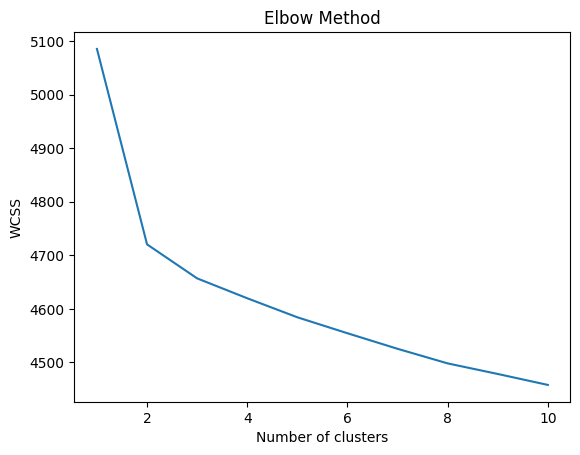

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Inference:**
From elbow method we choose number of clusters has 2.

K-means

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[0.00000000e+00, 5.06326377e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.21780746e-04, 8.09788267e-03, 9.20181767e-05, ...,
        1.10416355e-04, 2.51083381e-04, 7.09146769e-05]])

In [ ]:
y_kmeans = kmeans.predict(X)
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 0], dtype=int32)

In [ ]:
print ('Most Common Terms per Cluster:')
order_centroids = kmeans.cluster_centers_.argsort()[:,::-1] #sort cluster centers by proximity to centroid

for i in range(3):
    print("\n")
    print('Cluster %d:' % i)
    for j in order_centroids[i, :10]: #replace 10 with n words per cluster
        print ('%s' % terms[j]),
    print

Most Common Terms per Cluster:


Cluster 0:
en
route
crashed
disappeared
mountain
plane
cargo
weather
flight
conditions


Cluster 1:
takeoff
crashed
shortly
failure
overloaded
river
ocean
plane
burned
sea


Cluster 2:
crashed
aircraft
plane
approach
engine
pilot
mountain
runway
flight
failure


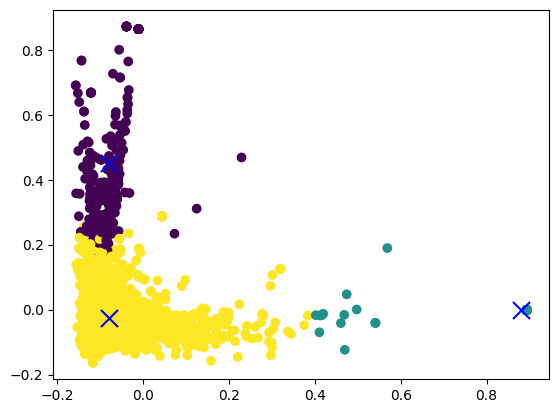

In [ ]:
# reduce the features to 2D
pca = PCA(n_components=3, random_state=random_state)
reduced_features = pca.fit_transform(X.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=kmeans.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

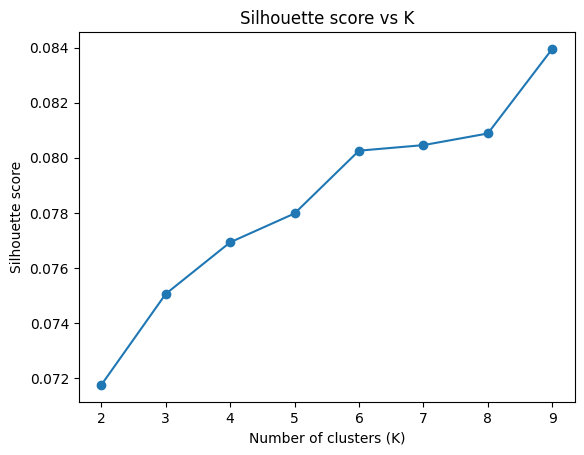

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# define the range of K values to test
k_values = range(2, 10)

# fit the KMeans model for each value of K and compute silhouette score
scores = []
for k in k_values:
    model = KMeans(n_clusters=k, random_state=0)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)
# plot the silhouette scores
plt.plot(k_values, scores, '-o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs K')
plt.show()

In [ ]:
# Validation
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(reduced_features,y_kmeans)
print("For n_clusters =", 3, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.7106112688439713


**Inference:**

A silhouette score of 0.71 indicates a relatively high level of similarity within clusters and dissimilarity between clusters. In general, a score above 0.5 is considered to be a good silhouette score, but as I mentioned before, the interpretation of the score also depends on the specific problem and dataset.

**PLOTTING A DENDROGRAM**
A dendrogram is a tree-like diagram that shows the hierarchical relationships between clusters in hierarchical clustering. It is a useful tool for visualizing the results of hierarchical clustering and can provide insights into the structure of the data.

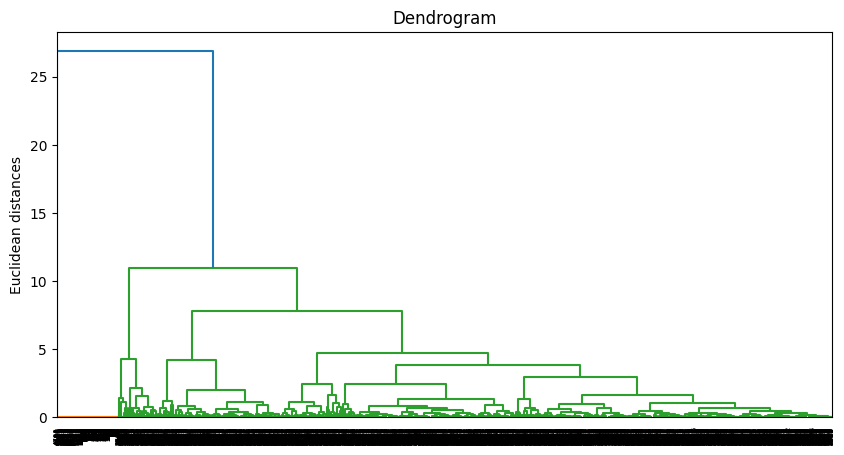

In [ ]:
# convert X to a dense matrix
X_dense = X.toarray()
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(reduced_features, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

**Inference:**
We will now determine the optimal number of clusters for our model. For this, We will find the maximum vertical distance that does not cut any horizontal bar.

**Hierarchical Model**

In [ ]:
#training the hierarchical model on dataset
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_pred= hc.fit_predict(reduced_features)

**Visualizing**

In [ ]:
import matplotlib
matplotlib.use('agg')

# Plot the clustered data
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(reduced_features[y_pred == 0, 0], reduced_features[y_pred == 0, 1],
            c='green', label='cluster 1')
plt.scatter(reduced_features[y_pred == 1, 0], reduced_features[y_pred == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(reduced_features[y_pred == 2, 0], reduced_features[y_pred == 2, 1],
            c='yellow', label='cluster 3')
plt.legend()
plt.title('Analysis')
ax.set_aspect('equal');

plt.savefig('plot.png')


In [ ]:
# Plot the clustered data
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(reduced_features[y_pred == 0, 0], reduced_features[y_pred == 0, 1],
            c='green', label='cluster 1')
plt.scatter(reduced_features[y_pred == 1, 0], reduced_features[y_pred == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(reduced_features[y_pred == 2, 0], reduced_features[y_pred == 2, 1],
            c='yellow', label='cluster 3')
plt.legend()
plt.title('Analysis')
ax.set_aspect('equal');

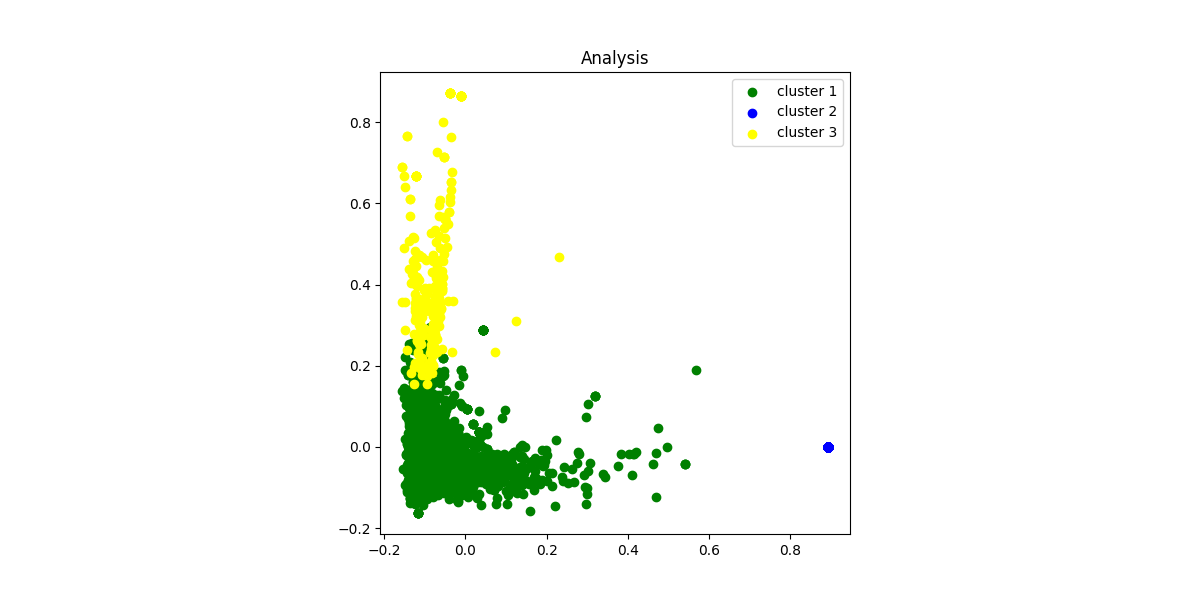

**Inference:**

From the above diagram we can see that there are three distinct clusters are formed. If we compare the both scatter plot of K-means clustering and hierarchical clustering we can infer that the datapoints in third cluster of hierarchical has less datapoints compared to K-means because it has dealt with outliears.

**DB SCAN CLUSTERING**

**INFERENCE:**
From the above diagram we can see that there are three distinct clusters are formed. If we compare the both scatter plot of K-means clustering ,hierarchical clustering and DB- scan we can infer that the datapoints in third cluster is the outlier of the clusters.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_sd = StandardScaler().fit_transform(X)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 58


In [ ]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()
plt.savefig('plot2.png')


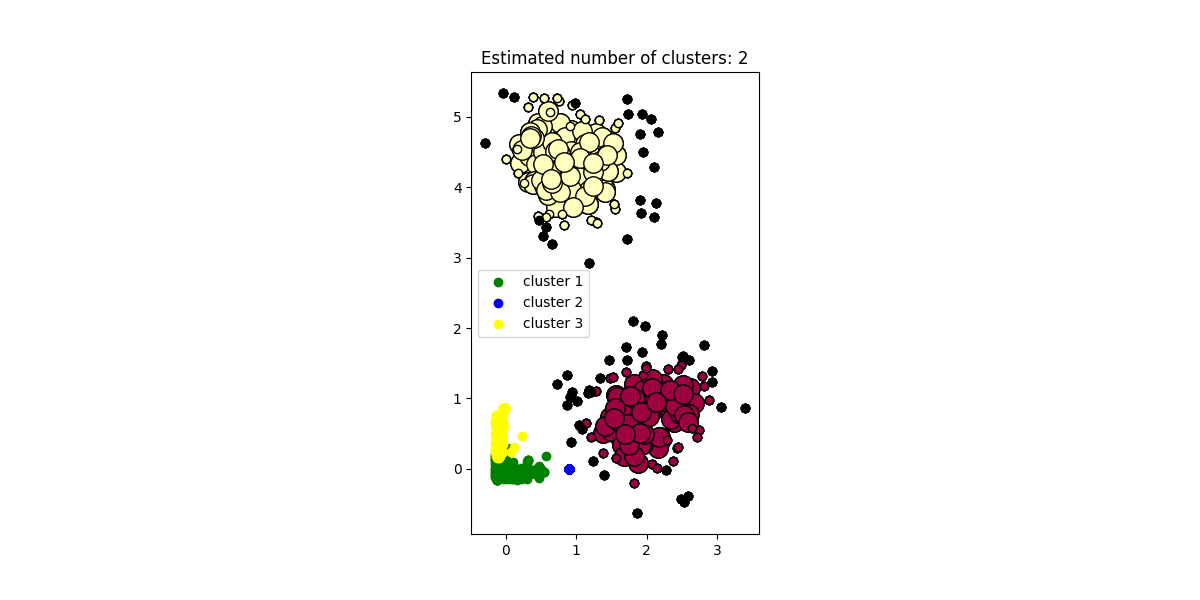

**INFERENCE:**
From the above diagram we can see that there are three distinct clusters are formed. If we compare the both scatter plot of K-means clustering ,hierarchical clustering and DB- scan we can infer that the datapoints in third cluster is the outlier of the clusters.